In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression

# Plot Data

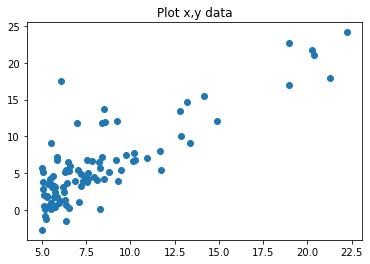

In [83]:
df = pd.read_csv("data2.txt", sep=",",header = None, names=["X", "Y"])
#print(df)

x = df["X"]
y = df["Y"]

x = np.array(x)
y = np.array(y)

a = plt.scatter(x,y)
plt.title("Plot x,y data")
plt.show()
#print(x.shape)

# Normal Equation

theta hat coefficients [-3.89578088  1.19303364]


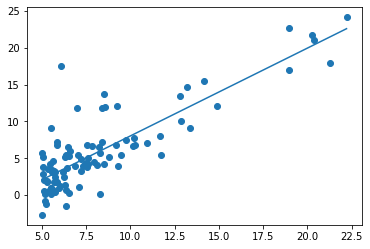

In [84]:
#set bias term to be equal to one for each term (x0 = 1)
xb = np.c_[np.ones((97,1)),x]
thetabest = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)

print('theta hat coefficients',thetabest)

plt.scatter(x,y)

t = np.linspace(min(x), max(x),1000)
plt.plot(t, thetabest[0]+thetabest[1]*t)
plt.show()


#print(xb)

# Batch Gradient Descent Training

mse is the cost fucntion and batch gradient descent is our optimization algorithm

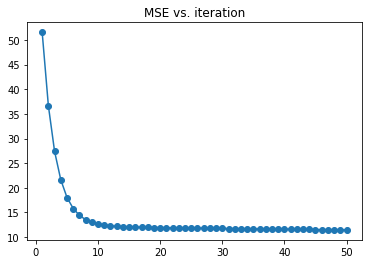

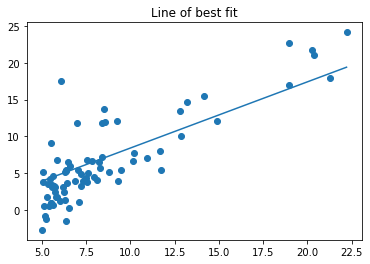

In [186]:
#80 training 20 testing 
data = df 

split = int(.8*len(data))

training = data[:split]
testing = data[split:]

trainingx = np.array(training["X"])
trainingy = np.array(training["Y"])
# print(trainingx.shape)

testingx = np.array(testing["X"])
testingy = np.array(testing["Y"])


xb_training = np.c_[np.ones((77,1)),trainingx]


###############################################################################
eta = 0.01 #cool n learning rate 
iterations  = 50
m = 77 #len of data 
mse_array = np.array([])

#staring theta parameters 
theta = np.array([0,0])


for i in range(iterations): 
    #this is the derivative of the MSE equation 
    gradients = 2/m*(xb_training.T.dot(xb_training.dot(theta)-trainingy))
    theta = theta - eta*gradients 

    
    #calculated MSE for linear regression because we are working with a linear equation 
    #mse = 1/m*np.sum(theta.T.dot(xb_training.T-trainingy)**2)
    mse = 1/m*np.dot((xb_training.dot(theta)-trainingy), (xb_training.dot(theta)-trainingy))
#   print(mse)
    mse_array = np.append(mse_array,mse)
    if mse_array[i-1]-mse_array[i]<=0.001:
        #print(mse_array[i-1],mse_array[i])
        #print(len(mse_array))
        continue
    
        
   
    
    
# print('trainig',theta)
###############################################################################
#plot mse vs iteration 
#x1 = np.arange(1,iterations+1,1)
x1 = np.arange(1,len(mse_array)+1,1)
# print(theta.shape)
y1 = mse_array 
#print(x1)


plt.scatter(x1,y1)
plt.plot(x1,y1)
plt.title("MSE vs. iteration")
plt.show()





###############################################################################
plt.scatter(trainingx,trainingy)

t = np.linspace(min(trainingx), max(trainingx),1000)
plt.plot(t, theta[0]+theta[1]*t)
plt.title("Line of best fit")
plt.show()

###############################################################################



# Batch Gradient Descent MSE vs. Learning Rate 

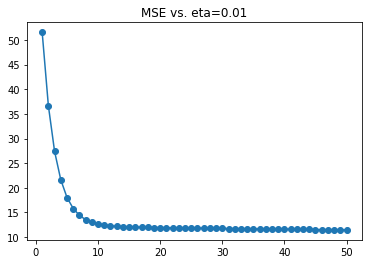

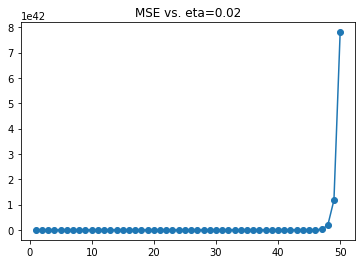

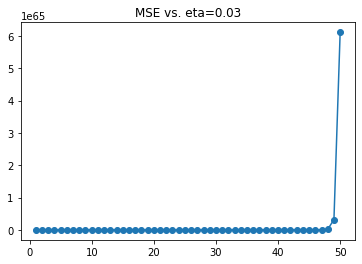

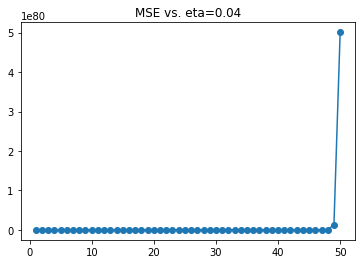

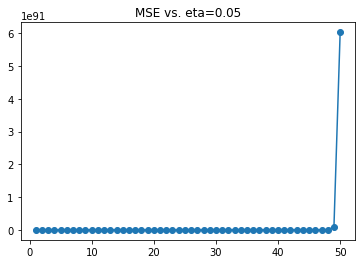

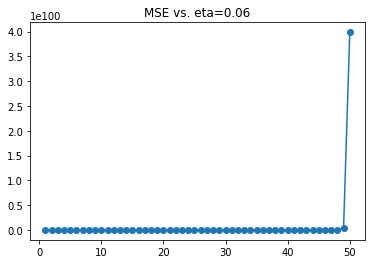

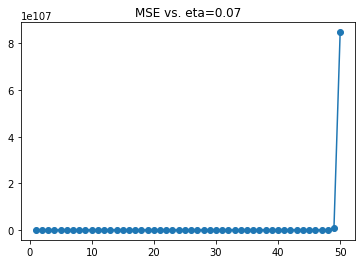

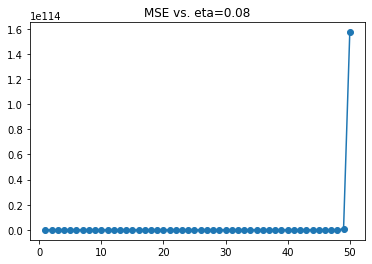

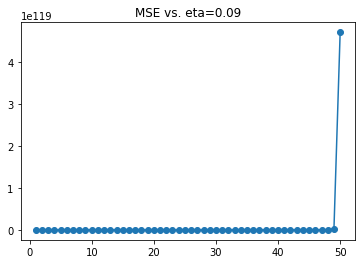

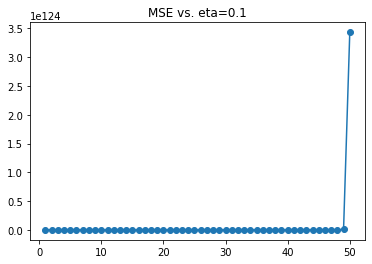

the best learning rate is eta = 0.01


In [195]:
#80 training 20 testing 
data = df 

split = int(.8*len(data))

training = data[:split]
testing = data[split:]

trainingx = np.array(training["X"])
trainingy = np.array(training["Y"])
# print(trainingx.shape)

testingx = np.array(testing["X"])
testingy = np.array(testing["Y"])


xb_training = np.c_[np.ones((77,1)),trainingx]


###############################################################################

eta = np.array([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]) 
iterations  = 50
m = 77 #len of data 


#staring theta parameters 

for j in range(len(eta)):
    mse_array = np.array([])
    theta = np.array([0,0])
    for i in range(iterations): 
        #this is the derivative of the MSE equation 
        gradients = 2/m*(xb_training.T.dot(xb_training.dot(theta)-trainingy))
        theta = theta - eta[j]*gradients 


    
        #calculated MSE for linear regression because we are working with a linear equation 
        mse = 1/m*np.dot((xb_training.dot(theta)-trainingy), (xb_training.dot(theta)-trainingy))
        mse_array = np.append(mse_array,mse)
        
    #plt.scatter(trainingx,trainingy,label = 'eta = {}'.format(eta[j]))
    #plot mse vs iteration 
    x2 = np.arange(1,iterations+1,1)
    y2 = mse_array 


    plt.scatter(x2,y2)
    plt.plot(x2,y2)
    plt.title("MSE vs. eta={}".format(eta[j]))
    plt.show()
    

###############################################################################
#PLOT LINE OF BEST FIT 
#plt.scatter(trainingx,trainingy)
#t = np.linspace(min(trainingx), max(trainingx),1000)
#plt.plot(t, theta[0]+theta[1]*t)
#plt.title("Line of best fit")
#plt.show()

###############################################################################

print('the best learning rate is eta = 0.01')

# Batch Gradient Descent Testing

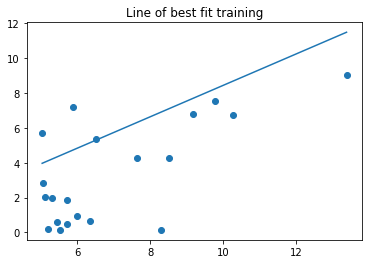

MSE testing 2.525515856843172


In [178]:
plt.scatter(testingx,testingy)

t = np.linspace(min(testingx), max(testingx),1000)
plt.plot(t, theta[0]+theta[1]*t)
plt.title("Line of best fit training")
plt.show()

#NOT REALLY SURE HOW TO PLOT MSE VS ITERATION FOR TESTING DATA? 


#mse_array = np.array([])

# append ones so that each data point (x, y) will have the x vector be [1, x]
xb_testing = np.c_[np.ones((len(testingx),1)),testingx]


mse = 1/m*np.dot((np.dot(xb_testing, theta)-testingy), (np.dot(xb_testing, theta)-testingy))
print('MSE testing',mse)  




# Stochastic Gradient Descent 

[-3.82157     1.35573305]


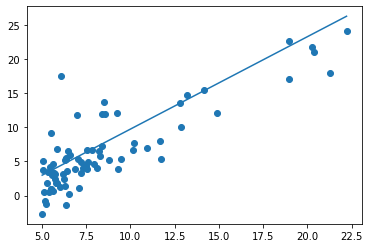

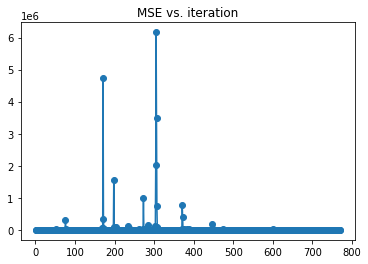

In [194]:
epochs = 10
eta = 0.01
b = len(trainingx)
theta3 = np.array([0,0])

mse_array = np.array([])

############################# TRAINING ########################
def learning_schedule(t): 
    return t0/(t+t1)


for j in range(epochs): 
    for i in range(b): 
        random_index = np.random.randint(b)
        xi = xb_training[random_index:random_index+1]
        yi = trainingy[random_index:random_index+1]
        gradients3 = 2*xi.T.dot(xi.dot(theta3)-yi)
        theta3 = theta3 -eta*gradients3
        
        mse = 1/b*np.dot((xb_training.dot(theta3)-trainingy), (xb_training.dot(theta3)-trainingy))
#         print(mse)
        mse_array = np.append(mse_array,mse)
#         print(mse_array)
print(theta3)

plt.scatter(trainingx,trainingy)

t = np.linspace(min(trainingx), max(trainingx),1000)
plt.plot(t, theta3[0]+theta3[1]*t)
plt.show()

x1 = np.arange(1,(epochs*b)+1,1)
y1 = mse_array 

#print(len(x1))
#print(len(y1))

plt.scatter(x1,y1)

plt.plot(x1,y1)
plt.title("MSE vs. iteration")
plt.show()




# Stoachstic Gradient Descent MSE vs. Learning Rate 

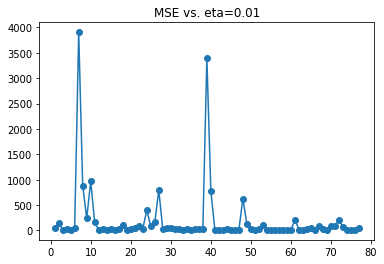

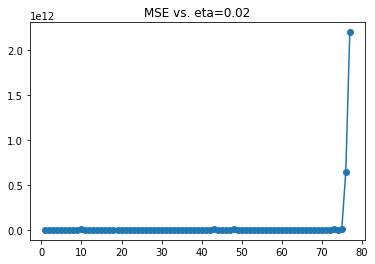

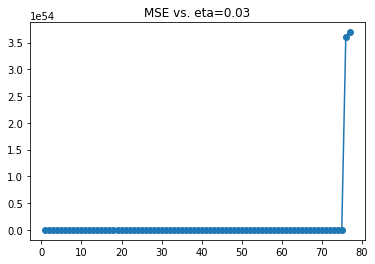

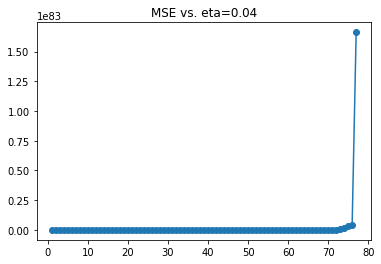

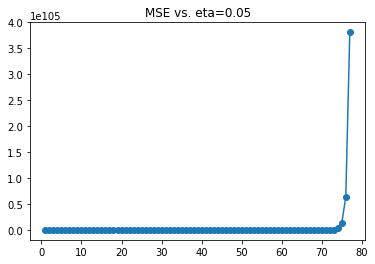

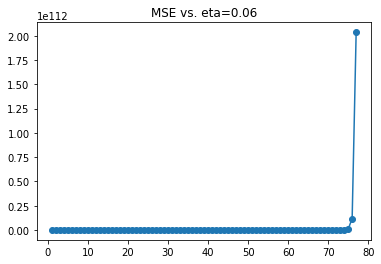

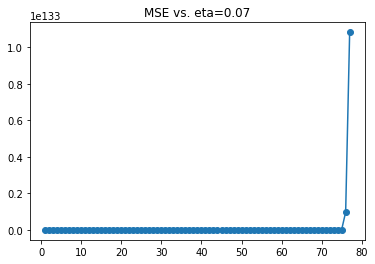

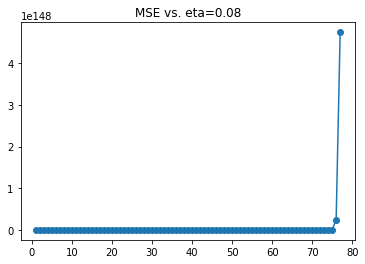

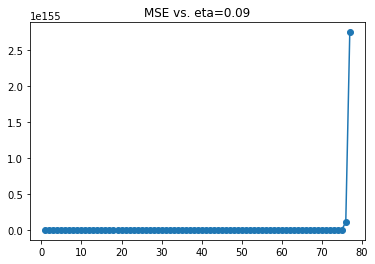

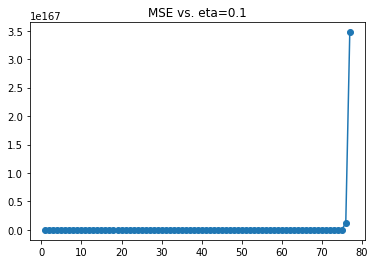

the best learning rate is eta = 0.01


In [196]:
epochs = 1
#we are not using the learning schedule 
eta2 = np.array([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1])
b = len(trainingx)


############################# TRAINING ########################


for k in range(len(eta2)):
    theta3 = np.array([0,0])
    mse_array = np.array([])
    for j in range(epochs): 
        for i in range(b): 
            random_index = np.random.randint(b)
            xi = xb_training[random_index:random_index+1]
            yi = trainingy[random_index:random_index+1]
            gradients3 = 2*xi.T.dot(xi.dot(theta3)-yi)
            theta3 = theta3-eta2[k]*gradients3

            mse = 1/b*np.dot((xb_training.dot(theta3)-trainingy), (xb_training.dot(theta3)-trainingy))
            mse_array = np.append(mse_array,mse)
            
            
            

    x2 = np.arange(1,(epochs*b)+1,1)
    y2 = mse_array 


    plt.scatter(x2,y2)
    plt.plot(x2,y2)
    plt.title("MSE vs. eta={}".format(eta2[k]))
    plt.show()

#line of best fit######

################################
print('the best learning rate is eta = 0.01')

# Stochastic Gradient Descent Testing

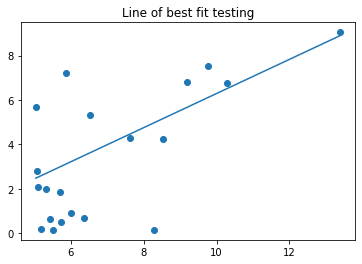

MSE 1.2613561080311027


In [179]:
plt.scatter(testingx,testingy)

t = np.linspace(min(testingx), max(testingx),1000)
plt.plot(t, theta3[0]+theta3[1]*t)
plt.title("Line of best fit testing")
plt.show()

mse = 1/b*np.dot((xb_testing.dot(theta3)-testingy), (xb_testing.dot(theta3)-testingy))
print('MSE',mse)

In [201]:
import math
parent = -((29/64)*np.log2(29/64)+(35/64)*np.log2(35/64))
print(parent)
pos = -18/29*np.log2(18/29)-11/29*np.log2(11/29)

neg = -33/35*np.log2(33/35)-2/35*np.log2(2/35)

t = 29/64
f = 35/64

a = t*pos + f*neg
print(parent-a)


0.9936507116910404
0.38694835728521915
